- In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
house_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
cols_num = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF']
cols_cat = ['HouseStyle','SaleType','GarageQual','GarageFinish','KitchenQual','HeatingQC','BsmtQual','ExterQual','Fireplaces']
cols = cols_num + cols_cat + ['SalePrice']
df = house_df.loc[:,cols]
df['Fireplaces'] = df['Fireplaces'].astype(str)
for col in cols_cat :
    dummies = pd.get_dummies(df[col],drop_first=True)
    df[dummies.columns] = dummies
df.drop(cols_cat,axis=1,inplace=True)
df[cols_num] = StandardScaler().fit_transform(df[cols_num])

In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

- Split your data into train and test sets.
- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [ ]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
display(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     159.9
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:45:33   Log-Likelihood:                -13871.
No. Observations:                1168   AIC:                         2.780e+04
Df Residuals:                    1139   BIC:                         2.795e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.06e+05   9799.221     21.022      0.000    1.87e+05    2.25e+05
OverallQual  2.395e+04   1844.014     12.989      0.000    2.03e+04    2.76e+04
GrLivArea     2.84e+04   2041.031     13.916      0.000    2.44e+04    3.24e+04
GarageArea   1.136e+04   1441.501      7.881      0.000    8532.748    1.42e+04
TotalBsmtSF  4117.7714   1800.454      2.287      0.022     585.192    7650.351
1.5Unf       5271.0118   1.14e+04      0.464      0.643    -1.7e+04    2.76e+04
1Story       1.637e+04   4249.233      3.852      0.000    8031.633    2.47e+04
2.5Fin      -2.263e+04   1.46e+04     -1.555      0.120   -5.12e+04    5921.231
2.5Unf      -3.161e+04   1.14e+04     -2.771      0.006    -5.4e+04   -9226.190
2Story        528.4794   4098.310      0.129      0.897   -7512.604    8569.563
SFoyer       1.779e+04   7857.523      2.265      0.024    2377.118    3.32e+04
SLvl         1.507e+04   6150.386      2.450      0.014    3003.015    2.71e+04
CWD          2.067e+04   1.88e+04      1.102      0.271   -1.61e+04    5.75e+04
Con          5.778e+04   2.58e+04      2.243      0.025    7242.927    1.08e+05
ConLD       -1976.0543   1.48e+04     -0.133      0.894   -3.11e+04    2.71e+04
ConLI          -3.8332   1.86e+04     -0.000      1.000   -3.65e+04    3.65e+04
ConLw        1.665e+04   1.89e+04      0.882      0.378   -2.04e+04    5.37e+04
New          3.032e+04   7222.521      4.198      0.000    1.61e+04    4.45e+04
Oth          4.513e+04   2.57e+04      1.755      0.080   -5336.038    9.56e+04
WD           1.436e+04   6063.857      2.369      0.018    2464.823    2.63e+04
Fa          -5.393e+04   1.34e+04     -4.011      0.000   -8.03e+04   -2.75e+04
Gd          -3.841e+04   6274.244     -6.122      0.000   -5.07e+04   -2.61e+04
Po          -3386.3075   3.68e+04     -0.092      0.927   -7.56e+04    6.88e+04
TA          -5.476e+04   7048.938     -7.769      0.000   -6.86e+04   -4.09e+04
RFn         -7789.6991   2816.158     -2.766      0.006   -1.33e+04   -2264.260
Unf         -1.374e+04   2893.377     -4.748      0.000   -1.94e+04   -8061.692
1            7203.4669   2484.390      2.899      0.004    2328.972    1.21e+04
2            2.955e+04   4310.374      6.855      0.000    2.11e+04     3.8e+04
3           -1.007e+05   1.87e+04     -5.387      0.000   -1.37e+05    -6.4e+04
==============================================================================
Omnibus:                      384.280   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28633.770
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      27.228   Cond. No.                         63.5
==============================================================================

Notes:
[1] Standard Errors assume that the covar

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.
- Is the performance of your model satisfactory? Why?

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


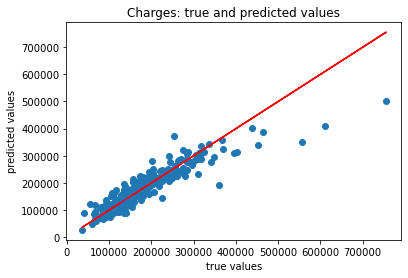

Mean absolute error of the prediction is           : 23579.188
Mean squared error of the prediction is            : 1380309965.237
Root mean squared error of the prediction is       : 37152.523
Mean absolute percentage error of the prediction is: 13.812


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is           : {:.3f}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is            : {:.3f}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is       : {:.3f}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {:.3f}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

    - The r squared of the model is satisfactory. In the graph, we see that our model predicts the lower values of the target better than the higher values

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [ ]:
X['OverallQual_sq'] = X['OverallQual']**2
X['OverallQual_GrLivArea'] = X['OverallQual'] * X['GrLivArea']
X['GarageArea_TotalBsmtSF'] = X['GarageArea'] * X['TotalBsmtSF']
X['TotRmsAbvGrd'] = house_df['TotRmsAbvGrd']
X['YearBuilt'] = house_df['YearBuilt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:45:46   Log-Likelihood:                -13766.
No. Observations:                1168   AIC:                         2.760e+04
Df Residuals:                    1134   BIC:                         2.777e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.428e+05   1.02e+05     -2.375      0.018   -4.43e+05   -4.22e+04
OverallQual             2.365e+04   1738.451     13.603      0.000    2.02e+04    2.71e+04
GrLivArea               2.567e+04   2608.781      9.839      0.000    2.05e+04    3.08e+04
GarageArea              8295.4870   1366.660      6.070      0.000    5614.020     1.1e+04
TotalBsmtSF             9226.0998   1736.194      5.314      0.000    5819.585    1.26e+04
1.5Unf                  5002.3810   1.05e+04      0.477      0.633   -1.56e+04    2.56e+04
1Story                  4859.8787   4039.016      1.203      0.229   -3064.906    1.28e+04
2.5Fin                  -2.35e+04   1.34e+04     -1.749      0.081   -4.99e+04    2865.955
2.5Unf                 -2.617e+04   1.05e+04     -2.482      0.013   -4.69e+04   -5485.563
2Story                 -4870.5485   3957.117     -1.231      0.219   -1.26e+04    2893.545
SFoyer                  4828.1496   7410.383      0.652      0.515   -9711.453    1.94e+04
SLvl                    7233.6049   5798.805      1.247      0.212   -4143.989    1.86e+04
CWD                      1.91e+04   1.72e+04      1.109      0.268   -1.47e+04    5.29e+04
Con                     4.916e+04   2.36e+04      2.079      0.038    2773.788    9.55e+04
ConLD                   1951.4458   1.36e+04      0.143      0.886   -2.47e+04    2.86e+04
ConLI                  -2423.6527   1.71e+04     -0.142      0.887    -3.6e+04    3.11e+04
ConLw                   1.965e+04   1.73e+04      1.134      0.257   -1.43e+04    5.36e+04
New                     3.371e+04   6711.069      5.023      0.000    2.05e+04    4.69e+04
Oth                     1.506e+04   2.37e+04      0.636      0.525   -3.14e+04    6.15e+04
WD                       1.49e+04   5574.259      2.673      0.008    3964.978    2.58e+04
Fa                     -4.946e+04   1.24e+04     -4.002      0.000   -7.37e+04   -2.52e+04
Gd                     -2.372e+04   6322.944     -3.752      0.000   -3.61e+04   -1.13e+04
Po                     -1.075e+04   3.37e+04     -0.319      0.750    -7.7e+04    5.55e+04
TA                      -3.09e+04   7133.549     -4.332      0.000   -4.49e+04   -1.69e+04
RFn                    -4849.5837   2633.318     -1.842      0.066      -1e+04     317.140
Unf                    -1.097e+04   2783.206     -3.940      0.000   -1.64e+04   -5505.719
1                       7927.3219   2302.124      3.443      0.001    3410.422    1.24e+04
2                        2.69e+04   4014.922      6.699      0.000     1.9e+04    3.48e+04
3                      -4.042e+04   1.82e+04     -2.226      0.026   -7.61e+04   -4785.101
OverallQual_sq          7065.3620   1031.173      6.852      0.000    5042.140    9088.584
OverallQual_GrLivArea   4961.0621   1120.949      4.426      0.000    2761.696  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


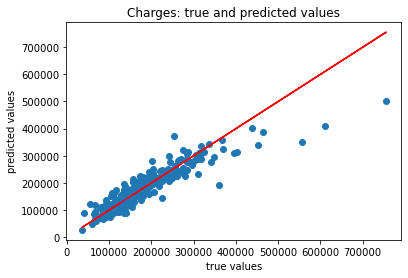

Mean absolute error of the prediction is           : 23103.902
Mean squared error of the prediction is            : 1169001883.086
Root mean squared error of the prediction is       : 34190.670
Mean absolute percentage error of the prediction is: 14.002


In [ ]:
X_test = sm.add_constant(X_test)

y_preds_2 = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is           : {:.3f}".format(mean_absolute_error(y_test, y_preds_2)))
print("Mean squared error of the prediction is            : {:.3f}".format(mse(y_test, y_preds_2)))
print("Root mean squared error of the prediction is       : {:.3f}".format(rmse(y_test, y_preds_2)))
print("Mean absolute percentage error of the prediction is: {:.3f}".format(np.mean(np.abs((y_test - y_preds_2) / y_test)) * 100))

    - The model has improved both as seen in the graph and according to performance metrics.